## Import packages and data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

print(raw_data_count)
print(cleaned_data_count)
print(recent_grads.head())

173
172
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270          

In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

## Visualization

In [97]:
# This function allows us to plot bar graphs for different features based on major categories
# feature_name refers to the column we wish to evaluate by major category

def plot_category_dist(feature_name):
    feature_per_cat = {}
    for cat in recent_grads['Major_category']:
        feature_per_cat[cat] = np.mean(recent_grads[recent_grads['Major_category'] == cat][feature_name])
    plt.bar(range(len(feature_per_cat)), feature_per_cat.values(), tick_label = list(feature_per_cat.keys()))
    plt.xticks(rotation='vertical')
    plt.ylabel(feature_name)

In [101]:
recent_grads['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources         9
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

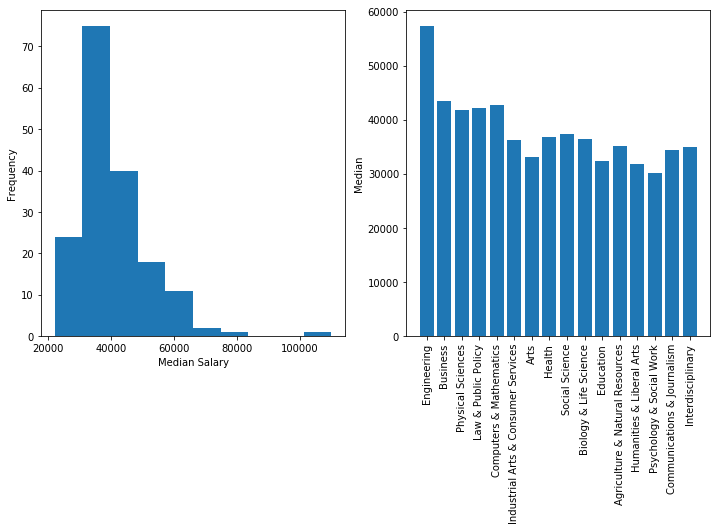

In [99]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.hist(recent_grads['Median'])
plt.xlabel('Median Salary')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plot_category_dist('Median')

#### The median salary for most majors is less than $40,000, and Engineering majors have significantly higher median salaries on average.

Text(0,0.5,'Median Salary')

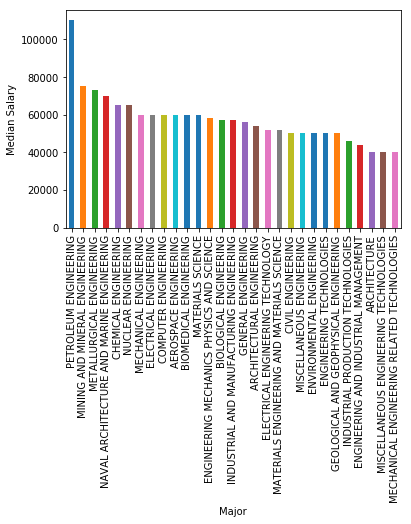

In [93]:
recent_grads[recent_grads['Major_category'] == 'Engineering'].plot.bar(x='Major', y='Median', legend=False)
plt.ylabel("Median Salary")

Text(0,0.5,'Median Salary')

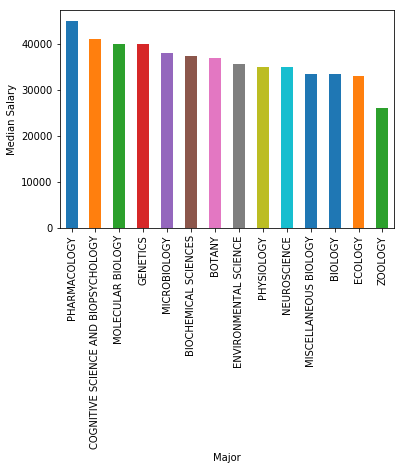

In [91]:
recent_grads[recent_grads['Major_category'] == 'Biology & Life Science'].plot.bar(x='Major', y='Median', legend=False)
plt.ylabel("Median Salary")

#### Depending on the major, there can be significant variation in salaries in different major categories, as illustrated by the salary distribution for Engineering and Biology majors respectively.

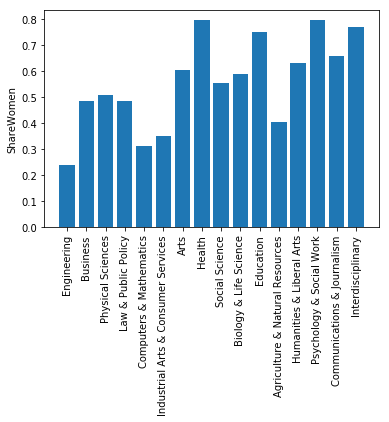

In [100]:
plot_category_dist('ShareWomen')

#### On average, Engineering majors are dominated by males, while Health, Psychology, and Education majors are dominated by women.

Text(0,0.5,'% Women')

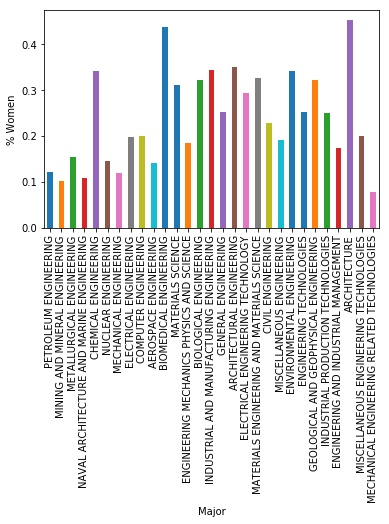

In [111]:
recent_grads[recent_grads['Major_category'] == 'Engineering'].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.ylabel("% Women")

#### Within Engineering, majors such as biomedical engineering and architecture have a slightly more balanced ratio of men to women. On the other hand, majors like mechanical engineering and petroleum engineering are very heavily male dominant.

Text(0,0.5,'% Women')

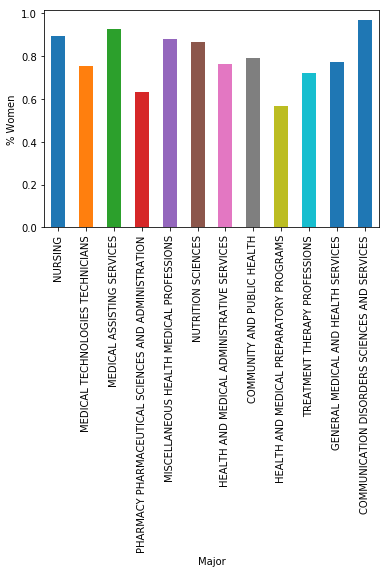

In [110]:
recent_grads[recent_grads['Major_category'] == 'Health'].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.ylabel("% Women")

#### Majors like nursing are very female dominant, while medical preparatory programs are more evenly distributed.

Text(0,0.5,'Frequency')

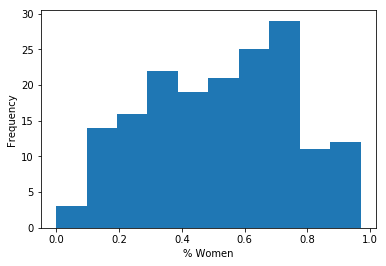

In [121]:
plt.hist(recent_grads['ShareWomen'])
plt.xlabel('% Women')
plt.ylabel('Frequency')

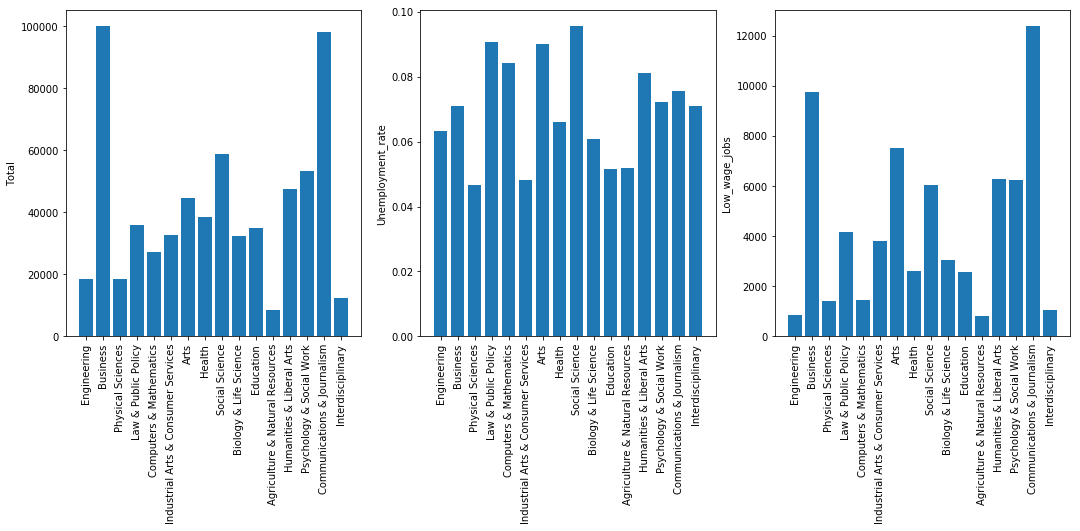

In [126]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plot_category_dist('Total')
plt.subplot(1,3,2)
plot_category_dist('Unemployment_rate')
plt.subplot(1,3,3)
plot_category_dist('Low_wage_jobs')

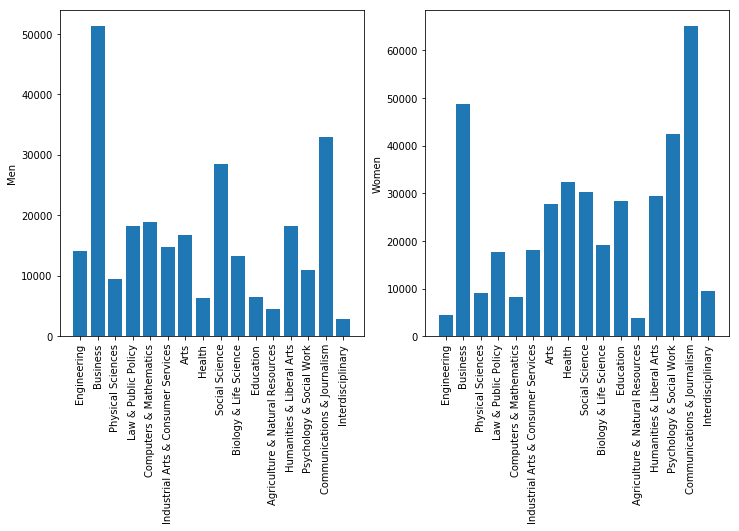

In [127]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_category_dist('Men')
plt.subplot(1,2,2)
plot_category_dist('Women')

#### Business and Communications/Journalism were by far the most popular major categories for both, men and women, as well as overall. Health and Education major categories are more popular for women. 
#### It is interesting that these are also the major categories with the highest number of low wage jobs.
#### The unemployment rate for majors in these categories is also around the median unemployment rate. 

Text(0,0.5,'Frequency')

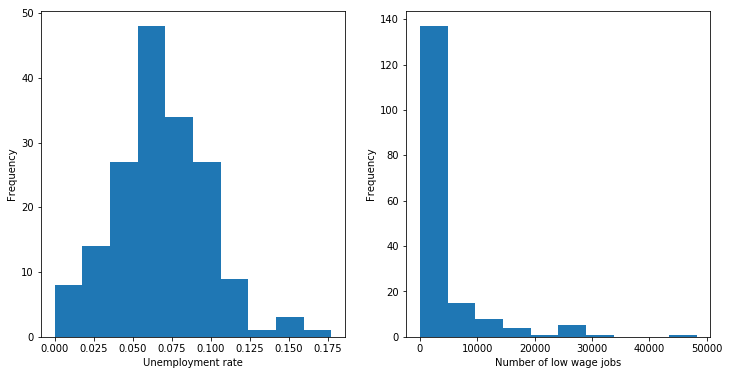

In [123]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(recent_grads['Unemployment_rate'])
plt.xlabel('Unemployment rate')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(recent_grads['Low_wage_jobs'])
plt.xlabel('Number of low wage jobs')
plt.ylabel('Frequency')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e81333748>,
      dtype=object)

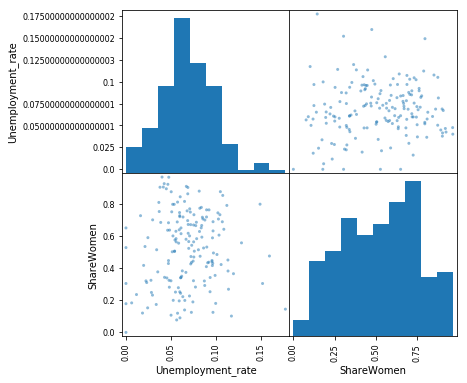

In [128]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Unemployment_rate', 'ShareWomen']], figsize=(6,6))